In [4]:
#a boolean to check if any null values
print(df.isnull().values.any())

False


In [5]:
labenc = LabelEncoder()

In [6]:
from sklearn.preprocessing import OrdinalEncoder # package which transform categorical values into numerical
ord_encoder = OrdinalEncoder() #transforming categorical values to numerical and storing it as the variable ord+encoder

In [7]:
df["review"] = ord_encoder.fit_transform(df[['review']])#transforms categorical value to numerical with review
df['review'].corr(df['rating']) #checks the correlation between review and rating


-0.04175608688557927

In [8]:
df["item"] = ord_encoder.fit_transform(df[['item']])#transforms categorical value to numerical with item
df['item'].corr(df['rating']) #checks the correlation between item and rating

0.05779297968097926

In [9]:
df["category"] = ord_encoder.fit_transform(df[['category']])#transforms categorical value to numerical with category
df["category"].corr(df['rating']) #checks the correlation between category and rating

-0.142478648194198

In [10]:
df["gender"] = ord_encoder.fit_transform(df[['gender']]) #transforms categorical value to numerical with gender
df["gender"].corr(df['rating']) #checks the correlation between gender and rating

-0.022168835059893272

## Comment

The code helped us answer tackle question 2 and 3 by transforming the categorical values such as review, item, category and gender into numerical by using the encoder and than proceeding to see the correlation betweeen the converted values with rated to check how the strength of a relationship between the two values.
All values have a weak correlation with rating. The strongest correlated features are category and rating with the value of -0.14(2dp).

In [11]:
X = df[['item', 'gender', 'category', 'review', 'rating' ]] #storing the column values inside X variable
y = df['rating'] #Storing the rating column in y variable

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 142) #splitting the dataset,training 90% of the data
print("train dimension",X_train.shape) #shows the dimension of the training model
print("test dimension:",X_test.shape) #shows the dimension of the testing model

train dimension (2416, 5)
test dimension: (269, 5)


In [13]:
reg_model = linear_model.LogisticRegression() #to establish a linear model in the dataset and to show predictions for model a
X_train_model = X_train[['category', 'review', 'item', 'gender' ]] #training with 4 values
y_train_model = X_train['rating'] #using the training model for rating


X_test_model = X_test[['category', 'review', 'item', 'gender' ]] #testing with 4 values
y_test_model = X_test['rating'] #utilising testing model with rating

reg_model.fit(X_train_model, y_train_model) #helps fit the model which establishes instances for



LogisticRegression()

In [14]:
model = LogisticRegression() #establishing a regression model
model.fit(X_train, y_train) #training a regression model
y_pred = model.predict(X_test)

predicting = model.predict(X_test) #to predict in the input samples

accuracy = accuracy_score(y_test, predicting) #checking how accurate the data is
print("Accuracy:", accuracy) #printing

Accuracy: 1.0


C:\Users\shahi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Comment

The data has been splitted as 90% of the data is being trained and 10% is being tested. The shape for the train model is 2416,5 and the shape for test model is 269,5. The reason to split the dataset is to estimate how good the learned model can generalise the new data and to avoid overfitting in the machine learning model. The next step was to train the logistech regression model which helps find patterns in the data and its aim is to not only help predict the data but solve problems. In this case we used four columns to establish a relation with 'rating'. The next step was to predict the rating as using this method the machine learning algorithm to predict the output future values with the placed values being continuous.



In [15]:
KNN_modeling = KNeighborsClassifier(n_neighbors = 10).fit(X_train_model,y_train_model)# trains a KNN classifier model
model = DecisionTreeRegressor(max_depth =3).fit(X_train_model, y_train_model) #to predict the target value
y_predict = KNN_modeling.predict(X_test_model) #predicting the value from the test model
print(y_predict) # prints the prediction


[1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1
 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1
 1 0 1 0 1 1 0 1 0 1]


In [16]:
accuracy = accuracy_score(y_predict,y_test_model) #predicts the accuracy from the test model
print("Accuracy:", round(accuracy, 2)) #prints the accuracy value

Accuracy: 0.65


## Comment

The same splitted dataset will be used for the KNN model with the 90% training size and 10% testing size. The KNN classified has been created also trained with the N_neighbors value of 10. Utilising this KNN model helps achieve  highly accurate predictions. The DecisionTreeRegressor is used for this model as it observes features and helps train the model which further helps predict the output in regards of the subset in which the model falls into. Once the data is predicted, it is time to see how accuracte the data is. In this case, it was 0.65 rounded 2dp. In the terms of KNN, the value of '1' means there are zero error rate. In this case, the error rate is not much but the data is not entirely accurate.

In [17]:
parameter_grid = {'n_neighbors': range(1, 35)} #getting a range of values from 1 to 35

#establishes a machine learing model
knn_clf_check = KNeighborsClassifier()  
clf_check = GridSearchCV(knn_clf_check, parameter_grid, scoring='accuracy', cv= 10)
clf_check.fit(X, y)

print('Greatest K Value: ', clf_check.best_params_['n_neighbors']) #prints the best K value
print('the accuracy: ', round(clf_check.best_score_,2)) #prints the accuracy

Greatest K Value:  33
the accuracy:  0.64


## Comment

Now the next step was to tune the hyperparamater K in KNN. First step was to establish a search base in range between 1 and 35 and introduce the machine learning process including gridsearch which helps find the optimal prameter values which is part of a cross validation procedure. the data was than fited and printing the accuracy which is rounded to 0.64 and the best K value is 33

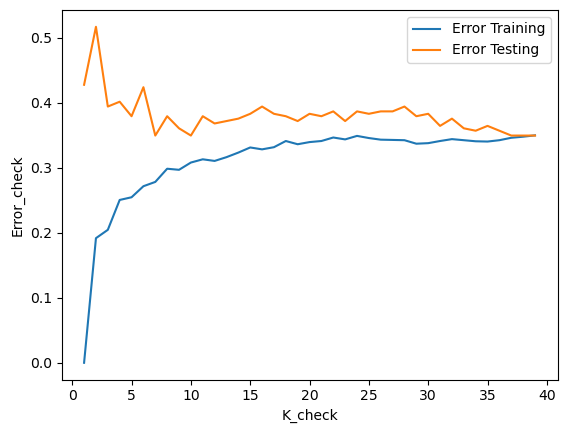

In [18]:
#establishing a graph representing K values in relation error checking with error training and testing
training_error=list()
testing_error=list()

for i in range(1, 40): #selection a range of K values between 1 and 40
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    training_error.append(1.0-accuracy_score(clf.predict(X_train), y_train))
    testing_error.append(1.0-accuracy_score(clf.predict(X_test), y_test))

#Designing the graph
plt.plot(range(1, 40), training_error, label='Error Training')
plt.plot(range(1, 40), testing_error, label='Error Testing')
plt.xlabel('K_check')
plt.ylabel('Error_check')
plt.legend(loc='best')
plt.show()

## Comment

The graph represents a relation between The K value and error_check which shows that as the K value increases the error rate increases for error training this is because large amount of data is being introduced which is bound to have an increase in errors. Moreover, for error testing as the K value increases, the error decreases. With the K value increasing can lead to underfitting which also leads to high variance. Further up the Value it shows that the error training and testing is breaking between K value of 35 and 40
